In [9]:
import numpy as np
import pandas as pd
import csv
from IPython.display import HTML, display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [10]:
def readData():    
    patientdata = pd.read_csv('mfcc_features_patient.csv', delimiter=' ')
    healthydata = pd.read_csv('mfcc_features_healthy.csv', delimiter=' ')
    
    return patientdata, healthydata

In [11]:
def createSamplesAndLabels(patient_df, healthy_df):
    print(len(healthy_df), len(patient_df))
    listofzeros = [0] * len(healthy_df)
    listofones = [1] * len(patient_df)
    
    patient_df['Label'] = listofones
    healthy_df['Label'] = listofzeros

    patient_samples = patient_df.to_numpy()
    healthy_samples = healthy_df.to_numpy()

    samples = np.vstack((patient_samples, healthy_samples))
#     print(samples[0], '\n', samples[120])
    np.random.shuffle(samples)

    # actual label of frame 1-patient; 0-healthy
    labels = samples[:,-1]
    labels = labels.astype(int)
    samples = np.delete(samples, -1, 1)
    
    # audio number to which the frame belongs
    # audio number: first digit represents healthy(0)/patient(1) - rest of the digits 
    # represent the audio number in each of healthy and patient
    audio_num = samples[:,-1]
    audio_num = audio_num.astype(int)
    samples = np.delete(samples, -1, 1)
#     print(len(samples), len(labels))

    return samples, labels, audio_num

In [37]:
from sklearn.svm import SVC

def svm(training_samples, training_labels, test_samples):
    clf = SVC(kernel="linear")
    clf.fit(training_samples, training_labels)
#     print("Training complete\n")
    return clf.predict(test_samples)

In [38]:
from sklearn.cluster import KMeans

def kMeans(training_samples, training_labels, test_samples):
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(training_samples, training_labels)
    return kmeans.predict(test_samples)

In [39]:
from sklearn.ensemble import RandomForestClassifier

def rf(training_samples, training_labels, test_samples):
    clf = RandomForestClassifier(random_state=1, n_estimators=300)
    clf.fit(training_samples, training_labels)
    return clf.predict(test_samples)

In [41]:
def calculate_cm_recall_precision(testlabels, y_true):
    y_pred = list(testlabels)
    labels = [0, 1]
    print(y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return confusion_matrix(y_true, y_pred), recall, precision, f1;

In [42]:
patient_df, healthy_df = readData();
samples, labels, audio_num = createSamplesAndLabels(patient_df, healthy_df)

4540 757


In [43]:
samples = samples.astype(np.floating)
labels = labels.astype(np.floating)
# print(type(samples), type(samples[0][0]))

/var/folders/vv/hdp_tqr92vj227jyt1bp9v7c0000gn/T/ipykernel_41484/424850385.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  samples = samples.astype(np.floating)
/var/folders/vv/hdp_tqr92vj227jyt1bp9v7c0000gn/T/ipykernel_41484/424850385.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  labels = labels.astype(np.floating)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.33)

In [28]:
predicted_test_labels_svm = svm(X_train, y_train, X_test)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.

/Users/blnkoff/PythonProjects/vocotrack/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


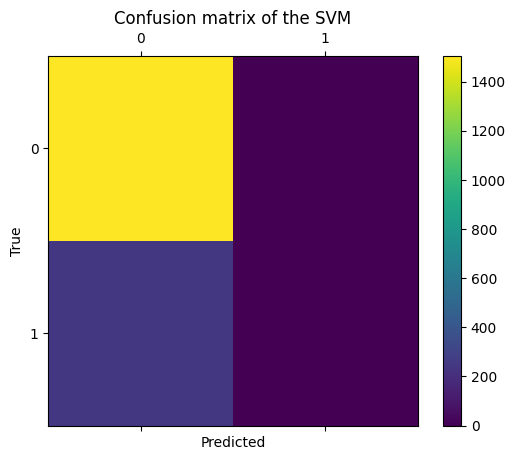

cm [[1505    0]
 [ 244    0]] 
recall 0.0 
precision 0.0 
f1: 0.0
meanf1: 0.0


[['SVM'],
 ['Metric', 'Healthy', 'Patient'],
 ['Recall', 0.0, 0.0],
 ['Precision', 0.0, 0.0],
 ['F1-Score', 0.0, 0.0],
 ['Accuracy', 0.8604917095483133]]

In [48]:
cm_svm, recall_svm, precision_svm, f1_svm = calculate_cm_recall_precision(predicted_test_labels_svm, y_test)
# plt.matshow(cm)
acc_svm = accuracy_score(predicted_test_labels_svm, y_test)

labels = ['Healthy', 'Patient']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_svm)
plt.title('Confusion matrix of the SVM')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("cm", cm_svm, "\nrecall", recall_svm, "\nprecision", precision_svm, "\nf1:", f1_svm)
print("meanf1:", np.mean(f1_svm))

answer_svm = [['SVM'],
                  ["Metric", "Healthy", "Patient"],
                  ["Recall", recall_svm, recall_svm],
                  ["Precision", precision_svm, precision_svm],
                  ["F1-Score", f1_svm, f1_svm],
               ["Accuracy", acc_svm],
                 ]

answer_svm

In [49]:
predicted_test_labels_k = kMeans(X_train, y_train, X_test)

[np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1)

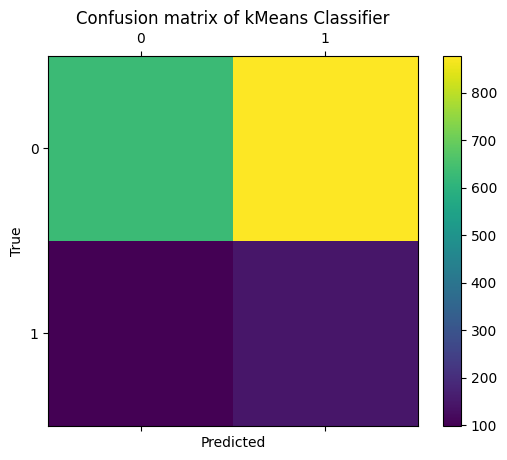

[['kMeans'],
 ['Metric', 'Healthy', 'Patient'],
 ['Recall', 0.5942622950819673, 0.5942622950819673],
 ['Precision', 0.14187866927592954, 0.14187866927592954],
 ['F1-Score', 0.22906793048973143, 0.22906793048973143],
 ['Accuracy', 0.4419668381932533]]

In [51]:
cm_k, recall_k, precision_k, f1_k = calculate_cm_recall_precision(predicted_test_labels_k, y_test)
# plt.matshow(cm)
acc_k = accuracy_score(predicted_test_labels_k, y_test)


labels = ['Healthy', 'Patient']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_k)
plt.title('Confusion matrix of kMeans Classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

answer_k = [['kMeans'],
                  ["Metric", "Healthy", "Patient"],
                  ["Recall", recall_k, recall_k],
                  ["Precision", precision_k, precision_k],
                  ["F1-Score", f1_k, f1_k],
            ["Accuracy", acc_k],
                 ]
answer_k

In [52]:
predicted_test_labels_r = rf(X_train, y_train, X_test)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.

/Users/blnkoff/PythonProjects/vocotrack/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


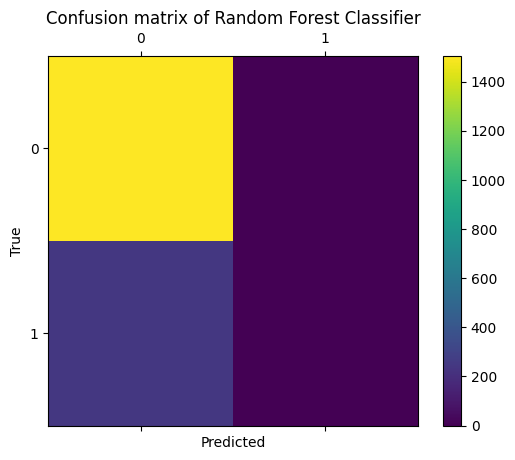

[['Random Forest'],
 ['Metric', 'Healthy', 'Patient'],
 ['Recall', 0.0, 0.0],
 ['Precision', 0.0, 0.0],
 ['F1-Score', 0.0, 0.0],
 ['Accuracy', 0.8604917095483133]]

In [54]:
cm_r, recall_r, precision_r, f1_r = calculate_cm_recall_precision(predicted_test_labels_r, y_test)
# plt.matshow(cm)

acc_r = accuracy_score(predicted_test_labels_r, y_test)
# print(acc_r)

labels = ['Healthy', 'Patient']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_r)
plt.title('Confusion matrix of Random Forest Classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

answer_r = [['Random Forest'],
                  ["Metric", "Healthy", "Patient"],
                  ["Recall", recall_r, recall_r],
                  ["Precision", precision_r, precision_r],
                  ["F1-Score", f1_r, f1_r],
                ["Accuracy", acc_r],
                 ]

answer_r